In [1]:
from google.colab import files
uploaded = files.upload()


Saving Algerian_forest_fires_cleaned.csv to Algerian_forest_fires_cleaned.csv


In [13]:
import pandas as pd
file_path = '/content/Algerian_forest_fires_cleaned.csv'
df = pd.read_csv(file_path)
print(df.head())


   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  


1. Data Cleaning and Preprocessing (1 Mark)
0.5 marks: Effective handling of errors.
0.5 marks: Appropriate feature selection and engineering.

In [16]:
# handling errors
# Check for missing values
print(df.isnull().sum())

# Ensure the correct data types
df_cleaned['day'] = df_cleaned['day'].astype(int)
df_cleaned['month'] = df_cleaned['month'].astype(int)
df_cleaned['year'] = df_cleaned['year'].astype(int)
df_cleaned['Temperature'] = df_cleaned['Temperature'].astype(float)
df_cleaned['RH'] = df_cleaned['RH'].astype(float)
df_cleaned['Ws'] = df_cleaned['Ws'].astype(float)
df_cleaned['Rain'] = df_cleaned['Rain'].astype(float)
df_cleaned['FFMC'] = df_cleaned['FFMC'].astype(float)
df_cleaned['DMC'] = df_cleaned['DMC'].astype(float)
df_cleaned['DC'] = df_cleaned['DC'].astype(float)
df_cleaned['ISI'] = df_cleaned['ISI'].astype(float)
df_cleaned['BUI'] = df_cleaned['BUI'].astype(float)
df_cleaned['FWI'] = df_cleaned['FWI'].astype(float)
df_cleaned['Classes'] = df_cleaned['Classes'].astype('category')
df_cleaned['Region'] = df_cleaned['Region'].astype('category')

# Inspect the cleaned dataset
print(df_cleaned.info())
print(df_cleaned.head())


day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   day          243 non-null    int64   
 1   month        243 non-null    int64   
 2   year         243 non-null    int64   
 3   Temperature  243 non-null    float64 
 4   RH           243 non-null    float64 
 5   Ws           243 non-null    float64 
 6   Rain         243 non-null    float64 
 7   FFMC         243 non-null    float64 
 8   DMC          243 non-null    float64 
 9   DC           243 non-null    float64 
 10  ISI          243 non-null    float64 
 11  BUI          243 non-null    float64 
 12  FWI          243 non

In [17]:
#feature selection and engeering
df_cleaned['Date'] = pd.to_datetime(df_cleaned[['year', 'month', 'day']])

# Drop the original 'day', 'month', and 'year' columns if 'Date' is sufficient
df_cleaned = df_cleaned.drop(columns=['day', 'month', 'year'])

# Inspect the final dataset
print(df_cleaned.info())
print(df_cleaned.head())

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  243 non-null    float64       
 1   RH           243 non-null    float64       
 2   Ws           243 non-null    float64       
 3   Rain         243 non-null    float64       
 4   FFMC         243 non-null    float64       
 5   DMC          243 non-null    float64       
 6   DC           243 non-null    float64       
 7   ISI          243 non-null    float64       
 8   BUI          243 non-null    float64       
 9   FWI          243 non-null    float64       
 10  Classes      243 non-null    category      
 11  Region       243 non-null    category      
 12  Date         243 non-null    datetime64[ns]
dtypes: category(2), datetime64[ns](1), float64(10)
memory usage: 22.0 KB
None
   Temperature    RH    Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI      Classes  \


3..Model Development and Analysis (1.5 Marks)
0.5 marks: Implementation of multiple linear regression and polynomial regression models.
0.5 marks: Application of regularization techniques (Lasso, Ridge, etc.).
0.5 marks: Effective use of cross-validation and hyperparameter tuning.

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

# Load the dataset
file_path = '/content/Algerian_forest_fires_cleaned.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Convert categorical columns to numeric if necessary
df['Classes'] = df['Classes'].astype('category').cat.codes
df['Region'] = df['Region'].astype('category').cat.codes

# Select features and target variable
X = df.drop(columns=['Temperature'])  # Assuming 'Temperature' is the target variable
y = df['Temperature']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Multiple Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
print("Linear Regression R^2:", linear_reg.score(X_test, y_test))


Linear Regression R^2: 0.38534590602133756


In [ ]:
# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)  # You can change the degree as needed
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
print("Polynomial Regression R^2:", poly_reg.score(X_test_poly, y_test))


Polynomial Regression R^2: -0.7720569671750424


In [ ]:
# Ridge Regression
ridge_reg = Ridge(alpha=1.0)  # You can tune the alpha parameter
ridge_reg.fit(X_train, y_train)
print("Ridge Regression R^2:", ridge_reg.score(X_test, y_test))

# Lasso Regression
lasso_reg = Lasso(alpha=0.1)  # You can tune the alpha parameter
lasso_reg.fit(X_train, y_train)
print("Lasso Regression R^2:", lasso_reg.score(X_test, y_test))


Ridge Regression R^2: 0.3874028440185957
Lasso Regression R^2: 0.4309352937765569


In [ ]:
# Cross-validation and Hyperparameter Tuning for Ridge Regression
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

ridge_params = {'ridge__alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

print("Best Ridge Regression R^2:", ridge_grid.best_score_)
print("Best Ridge Regression Params:", ridge_grid.best_params_)

# Cross-validation and Hyperparameter Tuning for Lasso Regression
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

lasso_params = {'lasso__alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(lasso_pipeline, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)

print("Best Lasso Regression R^2:", lasso_grid.best_score_)
print("Best Lasso Regression Params:", lasso_grid.best_params_)


Best Ridge Regression R^2: 0.5293655870517044
Best Ridge Regression Params: {'ridge__alpha': 10.0}
Best Lasso Regression R^2: 0.5314460174839344
Best Lasso Regression Params: {'lasso__alpha': 0.01}


2. Data Visualization and Observations (1 Mark)
0.5 marks: Creation of insightful visualizations that accurately represent the dataset.
0.5 marks: Clear and meaningful observations derived from the visualizations

<Figure size 1200x1000 with 0 Axes>

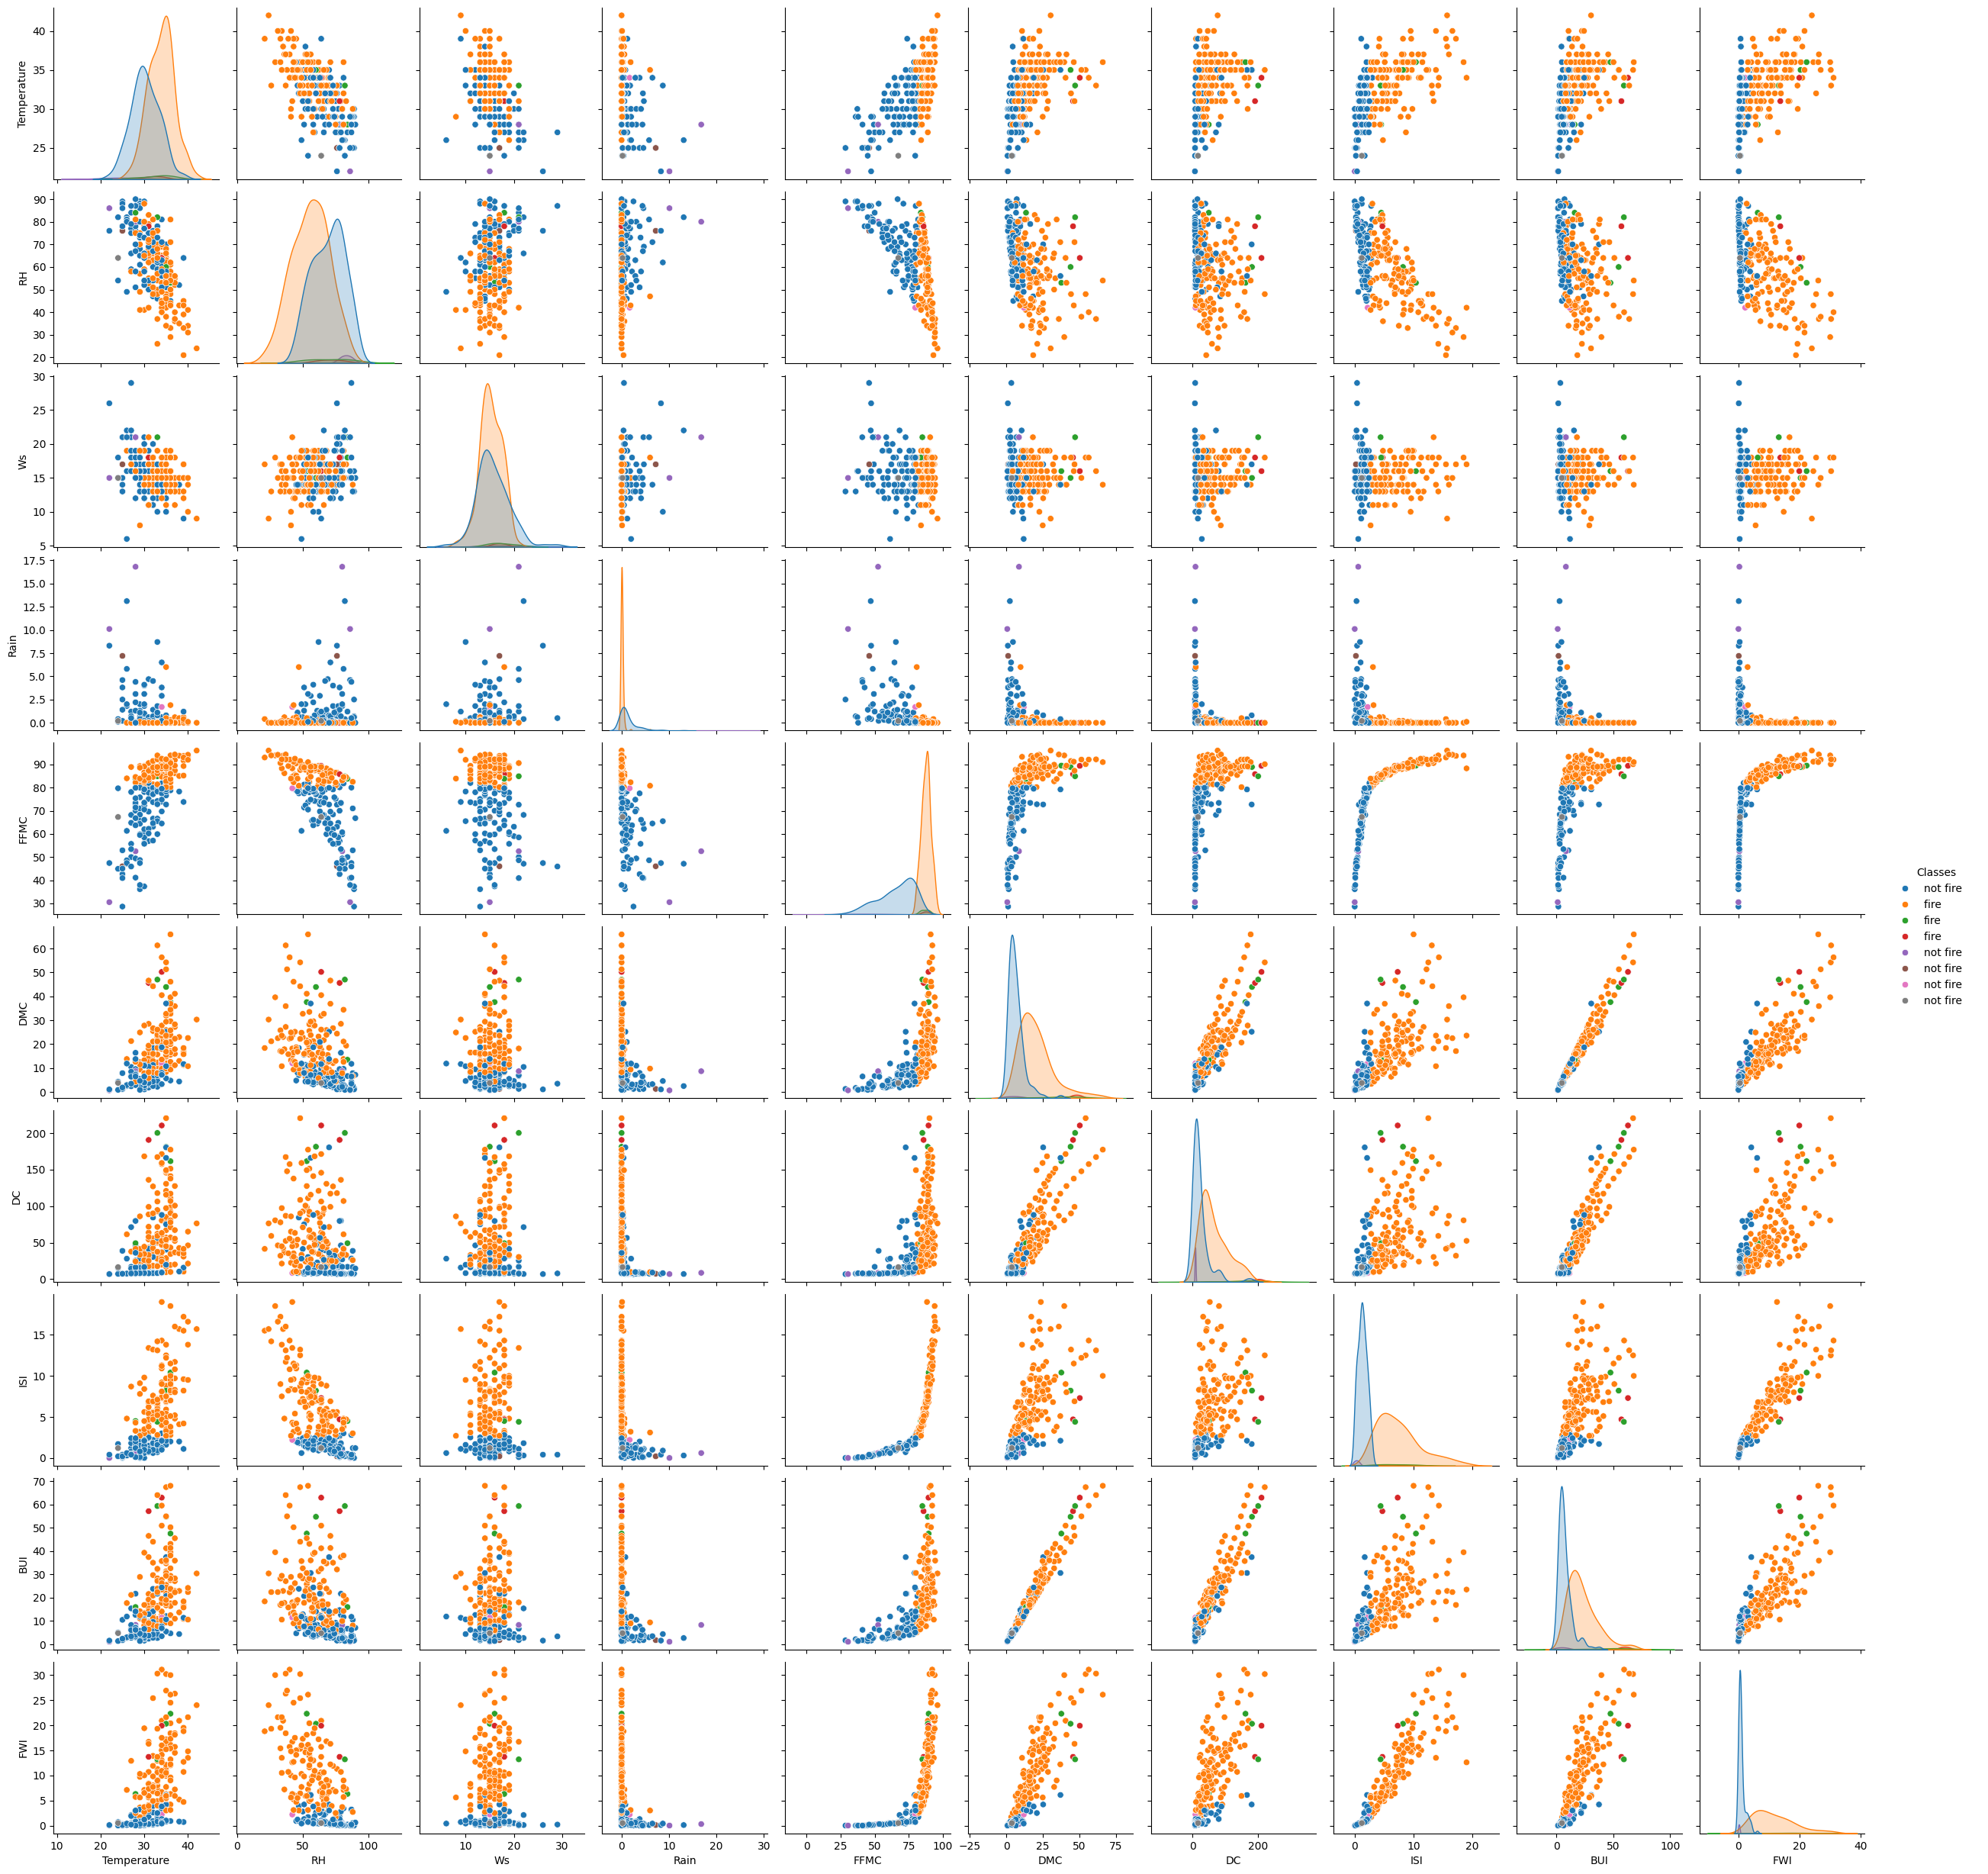

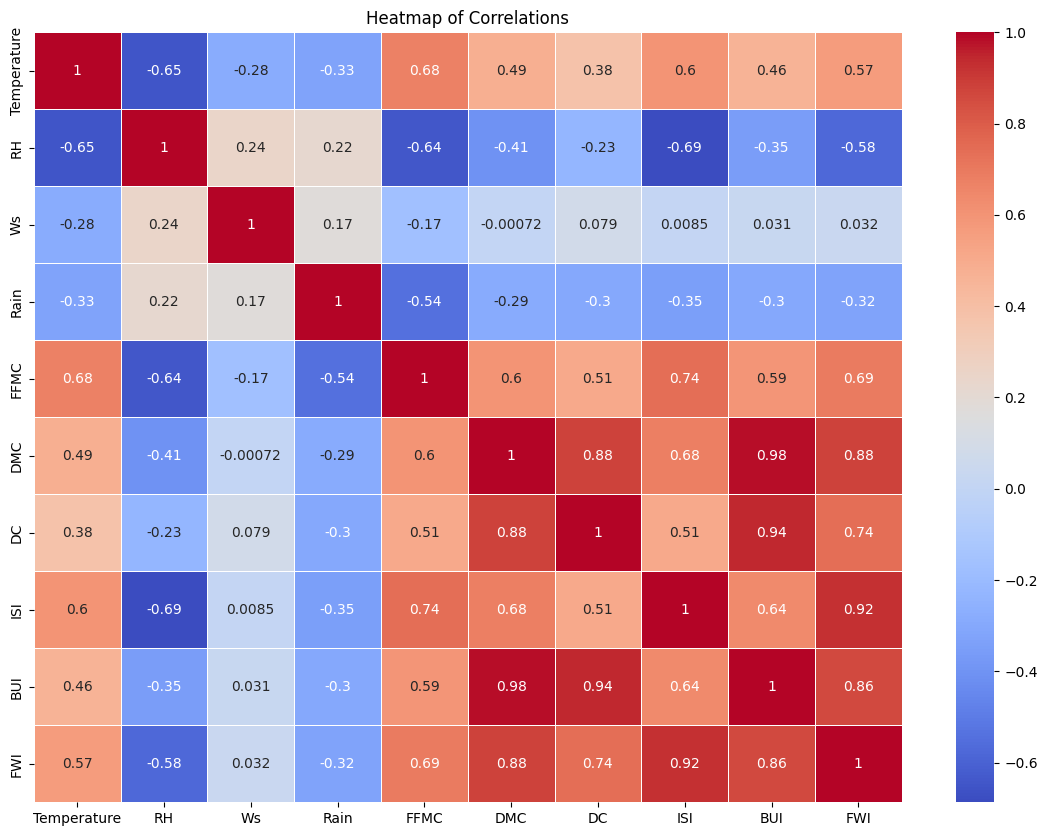

In [26]:

# 4. Pair Plot of Key Features
plt.figure(figsize=(12, 10))
key_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
sns.pairplot(df[key_features + ['Classes']], hue='Classes', diag_kind='kde')
plt.show()

# 5. Heatmap of Correlations
plt.figure(figsize=(14, 10))
correlation_matrix = df[key_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()

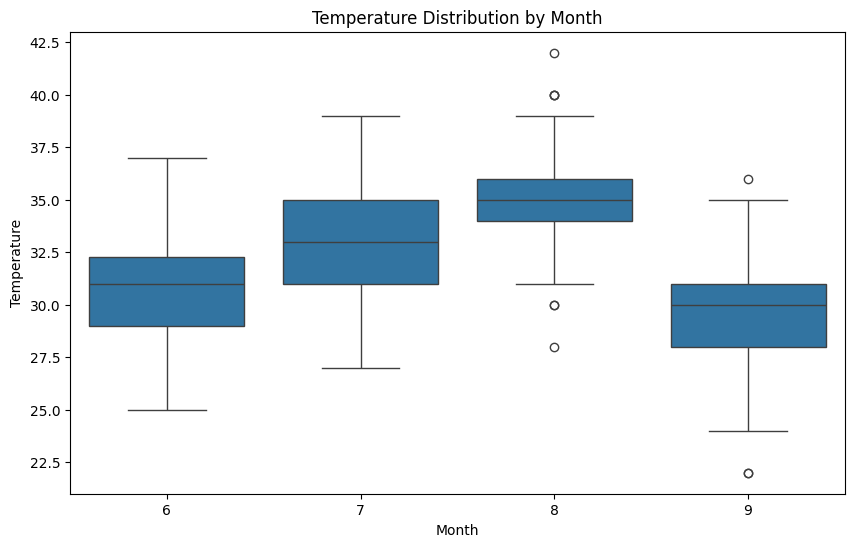

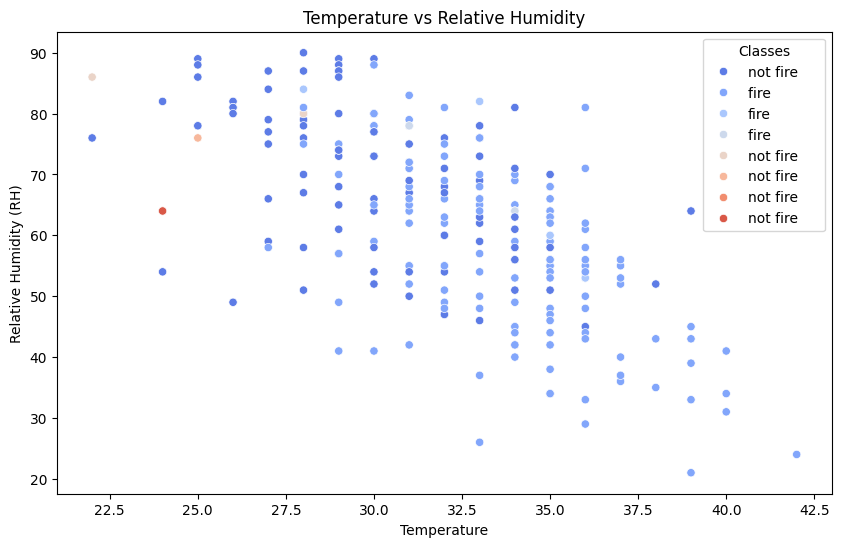

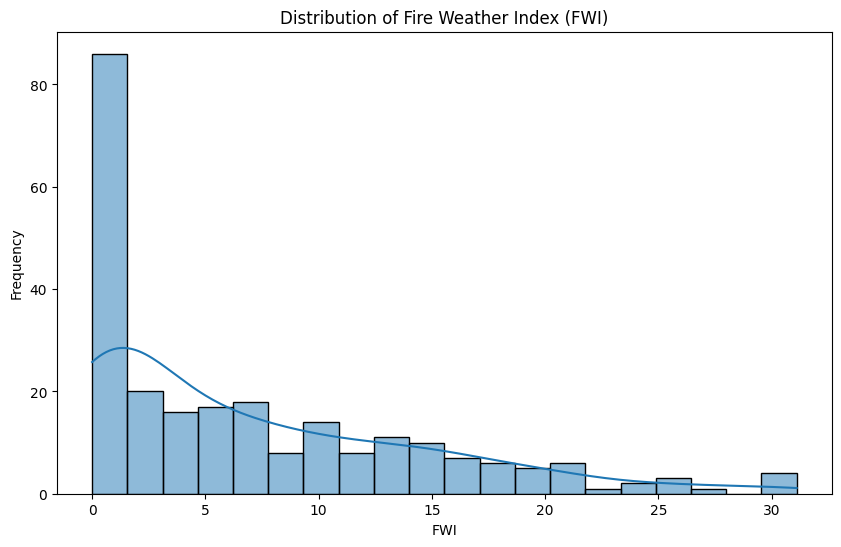

<ipython-input-24-0778a2ba2956>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='Rain', data=monthly_rainfall, palette='Blues_d')


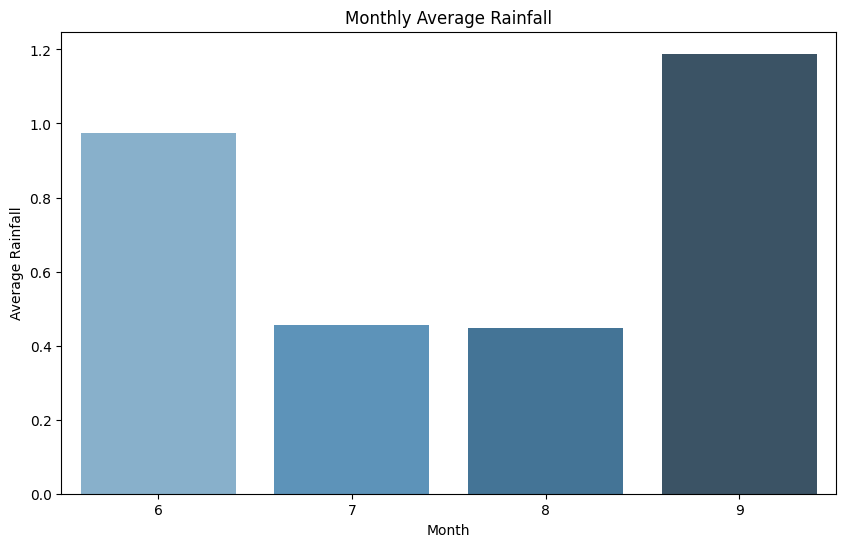

In [24]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Temperature Distribution by Month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='Temperature', data=df)
plt.title('Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

# 2. Temperature vs. Relative Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='RH', hue='Classes', data=df, palette='coolwarm')
plt.title('Temperature vs Relative Humidity')
plt.xlabel('Temperature')
plt.ylabel('Relative Humidity (RH)')
plt.show()

# 3. Distribution of Fire Weather Index (FWI)
plt.figure(figsize=(10, 6))
sns.histplot(df['FWI'], bins=20, kde=True)
plt.title('Distribution of Fire Weather Index (FWI)')
plt.xlabel('FWI')
plt.ylabel('Frequency')
plt.show()

# 4. Monthly Average Rainfall
monthly_rainfall = df.groupby('month')['Rain'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='Rain', data=monthly_rainfall, palette='Blues_d')
plt.title('Monthly Average Rainfall')
plt.xlabel('Month')
plt.ylabel('Average Rainfall')
plt.show()





4. Model Evaluation and Testing (1 Mark)
0.5 marks: Comprehensive evaluation of model performance using appropriate metrics.
0.5 marks: Testing the model on unseen data and providing a thorough analysis of results.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the cleaned dataset
df_cleaned = pd.read_csv('cleaned_dataset.csv')

# Define features and target
X = df_cleaned.drop(columns=['Classes', 'Date', 'Region'])
y = df_cleaned['Classes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (194, 10)
Testing data shape: (49, 10)


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.94
Precision: 0.90
Recall: 0.94
F1 Score: 0.92

Classification Report:
              precision    recall  f1-score   support

        fire       0.00      0.00      0.00         1
     fire          0.96      0.96      0.96        26
    not fire       0.00      0.00      0.00         1
 not fire          0.91      1.00      0.95        21

    accuracy                           0.94        49
   macro avg       0.47      0.49      0.48        49
weighted avg       0.90      0.94      0.92        49


Confusion Matrix:
[[ 0  1  0  0]
 [ 0 25  0  1]
 [ 0  0  0  1]
 [ 0  0  0 21]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

In [22]:
# For this example, we'll just use a part of the test set
unseen_data = X_test[:10]
unseen_labels = y_test[:10]

# Make predictions on unseen data
unseen_pred = model.predict(unseen_data)

# Calculate and print the metrics for the unseen data
unseen_accuracy = accuracy_score(unseen_labels, unseen_pred)
unseen_precision = precision_score(unseen_labels, unseen_pred, average='weighted')
unseen_recall = recall_score(unseen_labels, unseen_pred, average='weighted')
unseen_f1 = f1_score(unseen_labels, unseen_pred, average='weighted')

print(f"\nUnseen Data Metrics:")
print(f"Accuracy: {unseen_accuracy:.2f}")
print(f"Precision: {unseen_precision:.2f}")
print(f"Recall: {unseen_recall:.2f}")
print(f"F1 Score: {unseen_f1:.2f}")

# Print the classification report for the unseen data
print("\nUnseen Data Classification Report:")
print(classification_report(unseen_labels, unseen_pred))

# Print the confusion matrix for the unseen data
print("\nUnseen Data Confusion Matrix:")
print(confusion_matrix(unseen_labels, unseen_pred))



Unseen Data Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Unseen Data Classification Report:
              precision    recall  f1-score   support

     fire          1.00      1.00      1.00         5
 not fire          1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


Unseen Data Confusion Matrix:
[[5 0]
 [0 5]]
